In [11]:
#Linear regression
from sklearn.linear_model import LinearRegression

#Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

import csv
import pandas as pd
from collections import defaultdict
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable

In [3]:
rosettes = [3,6,7,11,12,13,14,15,18,19]

### Create graph

In [4]:
def graph_r(r):

    nodes = []
    edges = []
    edges_distances = []

    with open(f'./data/rosette{r}_nodes.csv', mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            if (row!=0):
                values = list(row.values())
                n = []
                n.append(float(values[0]))
                n.extend(22.5-2.5*np.log10([float(n) for n in list(values)[1:-1]]))
                n.append(float(values[-1]))
                nodes.append(n)

    with open(f'./data/rosette{r}_edges.csv', mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            if (row!=0):
                edges_distances.append([float(n) for n in list(row.values())])
                edges.append([float(n) for n in list(row.values())][:2])

    return (nodes,edges,edges_distances)

In [10]:
nodes, edges, distances = graph_r(rosettes[0])

### Correlation matrix

/var/folders/ls/yc9nb2gx14s6sstnjr_fcy5r0000gn/T/ipykernel_6937/1444036664.py:8: RuntimeWarning: divide by zero encountered in log10
  ed = [np.log10(c[n[0]]) for n in nodes]


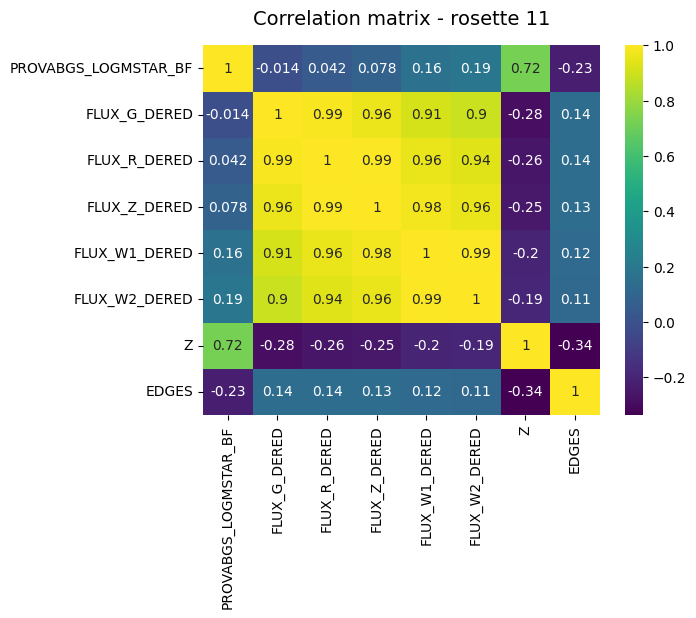

In [7]:
def correlation_matrix(r,nodes,edges):

    df = pd.read_csv(f'./data/rosette{r}_nodes.csv')
    c = defaultdict(int)
    for edge in edges:
        c[edge[0]] += 1
        c[edge[1]] += 1
    ed = [np.log10(c[n[0]]) for n in nodes]
    df['EDGES'] = ed

    df.drop('TARGET_ID', axis=1, inplace=True)
    matrix = sb.heatmap(df.corr(), cmap="viridis", annot=True)
    matrix.set_title(f'Correlation matrix - rosette {r}', fontsize=14, pad=15)
    plt.show()

nodes, edges, _ = graph_r(11)
correlation_matrix(11,nodes,edges)

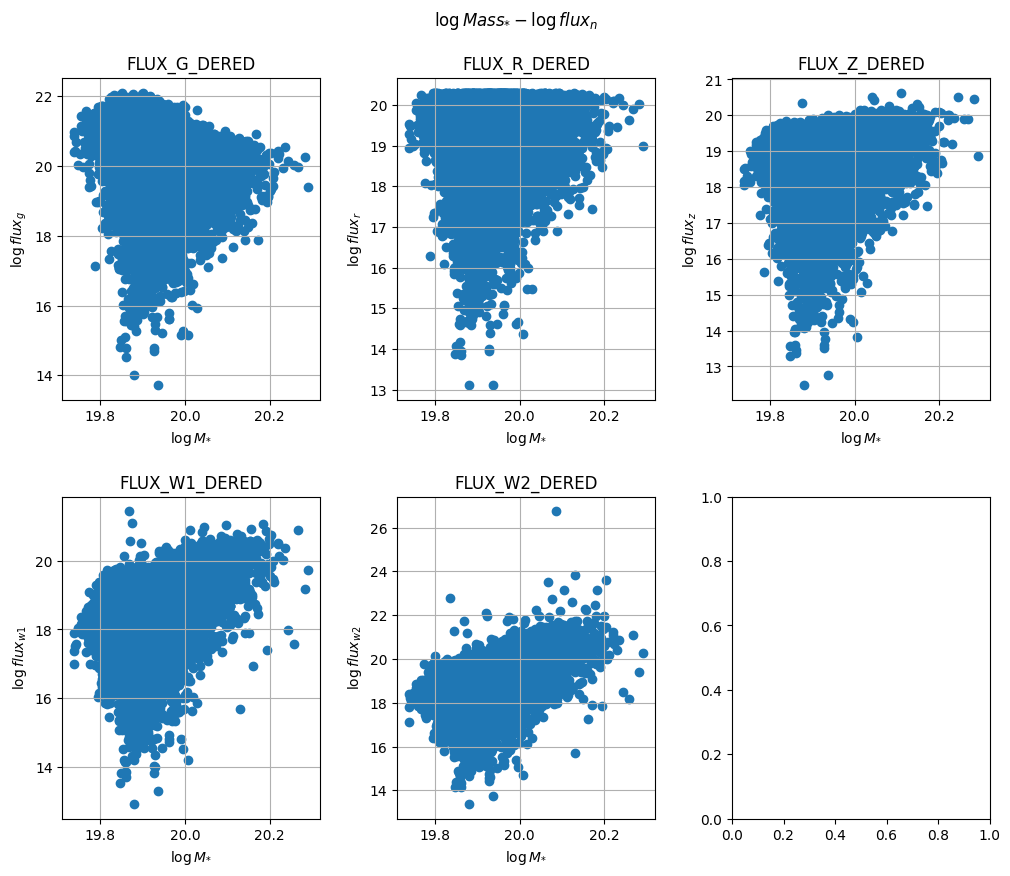

In [12]:
nodes, edges, _ = graph_r(11)

c = defaultdict(int)
for edge in edges:
    c[edge[0]] += 1
    c[edge[1]] += 1
m = [n[1] for n in nodes]
ed = [c[n[0]] for n in nodes]

f_g = [n[2] for n in nodes]
f_r = [n[3] for n in nodes]
f_z = [n[4] for n in nodes]
f_w1 = [n[5] for n in nodes]
f_w2 = [n[6] for n in nodes]

cmap = cm.viridis
n = (m - np.min(m)) / (np.max(m) - np.min(m))
min_norm = np.min(m)
max_norm = np.max(m)
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_norm, vmax=max_norm))
sm.set_array([])

nrows, ncols =  3, 2
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
plt.tight_layout()
plt.suptitle(r'$\log{Mass_{*}} - \log{flux_{n}}$', y=1.06)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

axes[0, 0].scatter(m, f_g, marker='o')
axes[0, 0].set_title('FLUX_G_DERED')
axes[0, 0].set_xlabel(r'$\log M_{*}$')
axes[0, 0].set_ylabel(r'$\log flux_{g}$')
axes[0, 0].grid()

axes[0, 1].scatter(m, f_r, marker='o')
axes[0, 1].set_title('FLUX_R_DERED')
axes[0, 1].set_xlabel(r'$\log M_{*}$')
axes[0, 1].set_ylabel(r'$\log flux_{r}$')
axes[0, 1].grid()

axes[0, 2].scatter(m, f_z, marker='o')
axes[0, 2].set_title('FLUX_Z_DERED')
axes[0, 2].set_xlabel(r'$\log M_{*}$')
axes[0, 2].set_ylabel(r'$\log flux_{z}$')
axes[0, 2].grid()

axes[1, 0].scatter(m, f_w1, marker='o')
axes[1, 0].set_title('FLUX_W1_DERED')
axes[1, 0].set_xlabel(r'$\log M_{*}$')
axes[1, 0].set_ylabel(r'$\log flux_{w1}$')
axes[1, 0].grid()

axes[1, 1].scatter(m, f_w2, marker='o')
axes[1, 1].set_title('FLUX_W2_DERED')
axes[1, 1].set_xlabel(r'$\log M_{*}$')
axes[1, 1].set_ylabel(r'$\log flux_{w2}$')
axes[1, 1].grid()

plt.show()

## Models

### Linear Model

In [10]:
model = LinearRegression()

Including **one** of [flux_g, flux_r, flux_z, flux_w1, flux_w2, z]

In [12]:
training_r = [3,6] #training rosettes
props = ['flux_g', 'flux_r', 'flux_z', 'flux_w1', 'flux_w2', 'z']

#training
for r in training_r:
    nodes, _, _ = graph_r(r)
    X = [n[2] for n in nodes]
    Y = [n[2] for n in nodes]

error: nan


Text(0, 0.5, 'mean squared error')

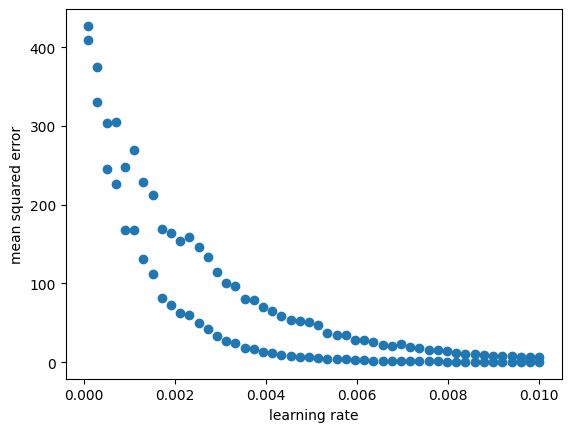

In [102]:
fg = np.array(values)
#fr = values[20:40]
#fz = values[40:60]
#fw1 = values[60:80]
#fw2 = values[80:100]
#z = values[100:]

plt.scatter(fg[:,0], fg[:,1])
plt.xlabel('learning rate')
plt.ylabel('mean squared error')

In [103]:
for i in range(len(props)):
    class LinearRegression(nn.Module):
        def __init__(self, input_size, output_size):
            super(LinearRegression, self).__init__()
            self.linear = nn.Linear(input_size, output_size)

        def forward(self, x):
            return self.linear(x)

    input_size = 1 #galaxya prop, just one [flux g, flux r, flux z, flux w1, flux w2, z]
    output_size = 1  #mass

    model = LinearRegression(input_size, output_size)
    criterion = nn.MSELoss()  #Mean squared error loss function

    optimizer = SGD(model.parameters(), lr=0.004)  #Stochastic gradient descent

    for r in training_r:

        nodes, _, _ = graph_r(r)

        inputs = np.array([[flux_g, flux_r, flux_z, flux_w1, flux_w2, z] for [_, _, flux_g, flux_r, flux_z, flux_w1, flux_w2, z] in nodes])
        inputs_i = torch.tensor(inputs[:,i], dtype=torch.float32).unsqueeze(1)

        targets = [[mass] for [_, mass, _, _, _, _, _, _] in nodes]
        targets = torch.tensor(targets, dtype=torch.float32)

        for epoch in range(num_epochs):
            outputs = model(inputs_i)
            loss = criterion(outputs, targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        nodes, _, _ = graph_r(rosettes[7])
        new_data = np.array([[flux_g, flux_r, flux_z, flux_w1, flux_w2, z] for [_, _, flux_g, flux_r, flux_z, flux_w1, flux_w2, z] in nodes]) #rosette 15 test
        test = [[mass] for [_, mass, _, _, _, _, _, _] in nodes]

        new_data = torch.tensor(new_data[:,i], dtype=torch.float32).unsqueeze(1)
        test = torch.tensor(test, dtype=torch.float32)

        with torch.no_grad(): #Test new
            predictions = model(new_data)
            pred.append(predictions)

        mse = criterion(predictions, test)
        print(f'error {props[i]}: {mse.item()}')

/var/folders/ls/yc9nb2gx14s6sstnjr_fcy5r0000gn/T/ipykernel_76970/2401243092.py:14: RuntimeWarning: invalid value encountered in log10
  n.extend(22.5-2.5*np.log10([float(n) for n in list(values)[1:-1]]))


error flux_g: inf
error flux_g: nan
error flux_r: inf
error flux_r: nan
error flux_z: inf
error flux_z: nan
error flux_w1: nan
error flux_w1: nan
error flux_w2: nan
error flux_w2: nan
error z: 76.28136444091797
error z: 14.533655166625977


/var/folders/ls/yc9nb2gx14s6sstnjr_fcy5r0000gn/T/ipykernel_76970/2401243092.py:14: RuntimeWarning: invalid value encountered in log10
  n.extend(22.5-2.5*np.log10([float(n) for n in list(values)[1:-1]]))


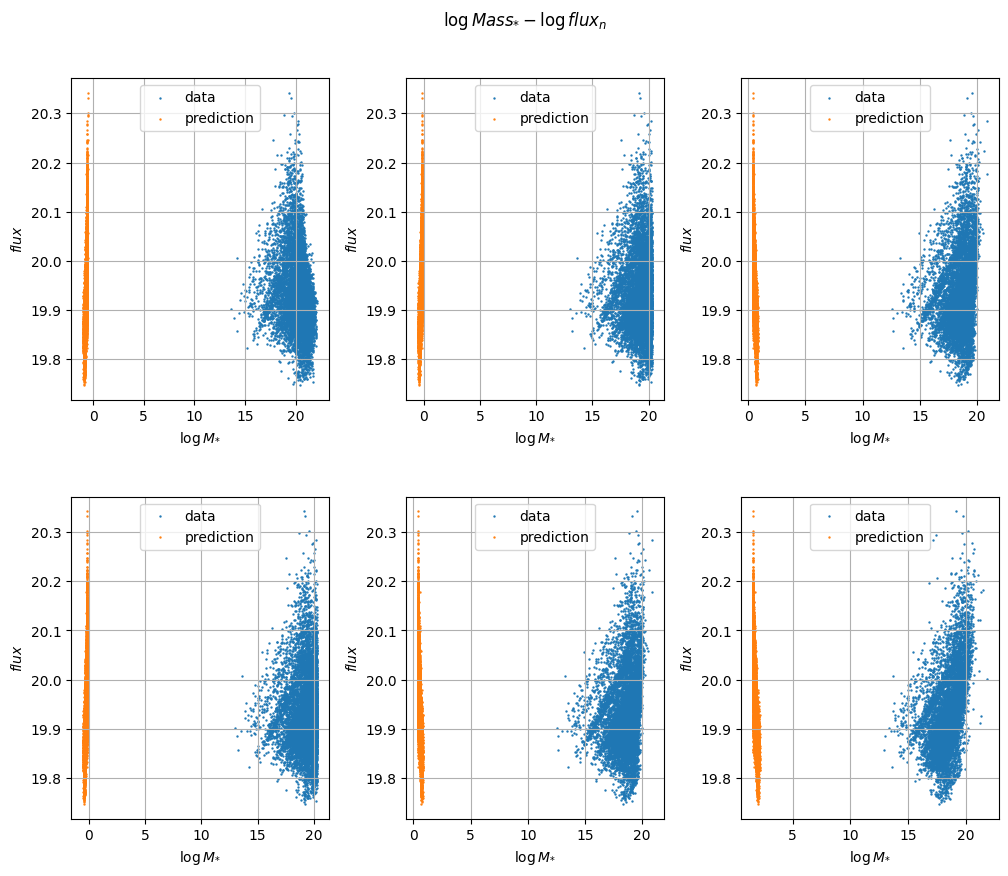

In [104]:
nodes, _, _ = graph_r(rosettes[7])
m = [mass for [_, mass, _, _, _, _, _, _] in nodes]
flux = np.array([[flux_g, flux_r, flux_z, flux_w1, flux_w2, z] for [_, _, flux_g, flux_r, flux_z, flux_w1, flux_w2, z] in nodes])

nrows, ncols =  3, 2
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
plt.tight_layout()
plt.suptitle(r'$\log{Mass_{*}} - \log{flux_{n}}$', y=1.06)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i in range(2):
    for j in range(3):
        axes[i, j].scatter(flux[:,i+j], m, s=0.5, label='data') #data
        axes[i, j].scatter(pred[i + j].numpy(), m, s=0.5, label='prediction') #predictions
        axes[i, j].legend()
        axes[i, j].set_title('')
        axes[i, j].set_xlabel(r'$\log M_{*}$')
        axes[i, j].set_ylabel(r'$flux$')
        axes[i, j].grid()

plt.show()

### Random Forest

In [14]:
nodes, _, _ = graph_r(rosettes[0])
X = [[flux_g, flux_r, flux_z, flux_w1, flux_w2, z] for [_, _, flux_g, flux_r, flux_z, flux_w1, flux_w2, z] in nodes]
y = [mass for [_, mass, _, _, _, _, _, _] in nodes]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0003585898136880753


In [15]:
nodes, _, _ = graph_r(rosettes[0])
X = [[flux_g, flux_r, flux_z, flux_w1, flux_w2, z] for [_, _, flux_g, flux_r, flux_z, flux_w1, flux_w2, z] in nodes]
y = [mass for [_, mass, _, _, _, _, _, _] in nodes]

X = np.array(X)
np.count_nonzero(np.isnan(X)) #! ya no hay negativos en los flujos

0

In [16]:
nodes, _, _ = graph_r(rosettes[1])
X = [[flux_g, flux_r, flux_z, flux_w1, flux_w2, z] for [_, _, flux_g, flux_r, flux_z, flux_w1, flux_w2, z] in nodes]
y = [mass for [_, mass, _, _, _, _, _, _] in nodes]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.999, random_state=42)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0004332600055015164


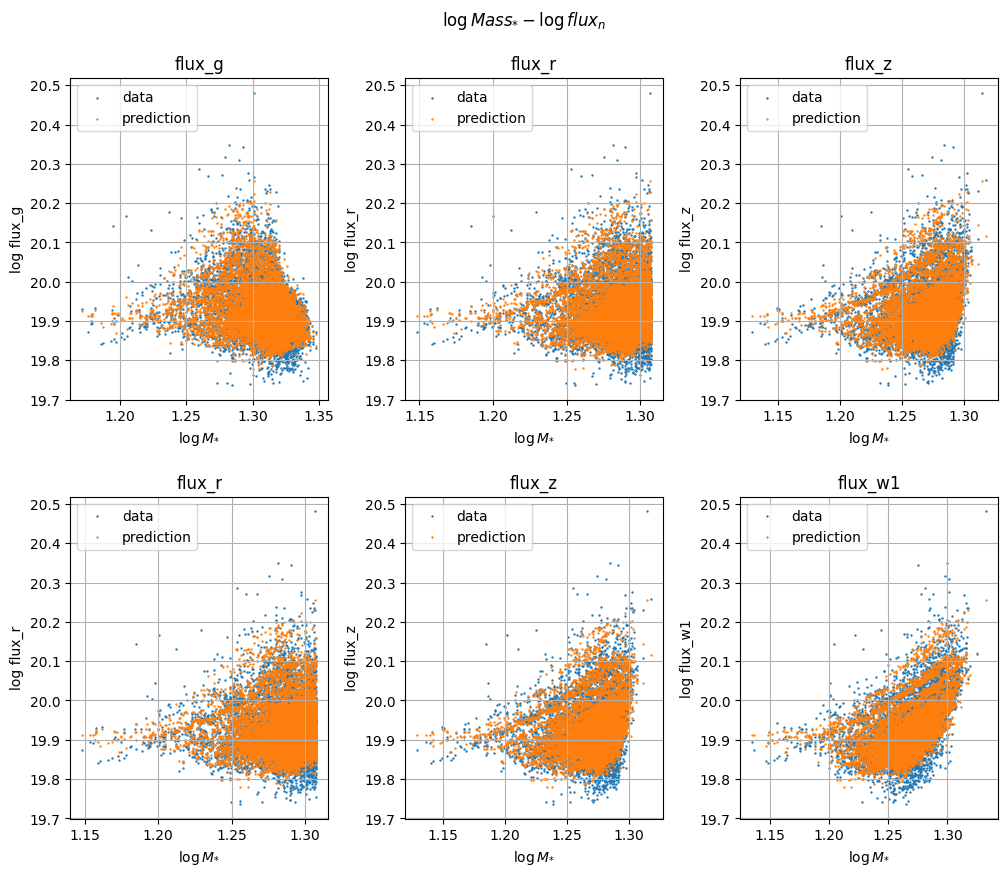

In [17]:
X_test = np.log10(np.array(X_test))
labels = ['flux_g', 'flux_r', 'flux_z', 'flux_w1', 'flux_w2', 'z']

nrows, ncols =  3, 2
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
plt.tight_layout()
plt.suptitle(r'$\log{Mass_{*}} - \log{flux_{n}}$', y=1.06)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i in range(2):
    for j in range(3):
        axes[i, j].scatter(X_test[:,i+j], y_test, s=0.5, label='data') #data
        axes[i, j].scatter(X_test[:,i + j], y_pred, s=0.5, label='prediction') #predictions
        axes[i, j].legend()
        axes[i, j].set_title(labels[i+j])
        axes[i, j].set_xlabel(r'$\log M_{*}$')
        axes[i, j].set_ylabel(f'log {labels[i+j]}')
        axes[i, j].grid()

plt.show()

### Graph Neural Network (GNN)

In [ ]:
nodes, edges, distances = graph_r(rosettes[0])

node_features = torch.tensor(nodes, dtype=torch.float)
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

graph = Data(x=node_features, edge_index=edge_index)
graph.num_nodes = len(nodes)
graph.num_edges = len(edges)

In [ ]:
class GNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleGNN, self).__init__()
        self.conv1 = nn.GCNConv(input_dim, hidden_dim)
        self.conv2 = nn.GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)

        return x